<a href="https://colab.research.google.com/github/cxbxmxcx/Practical_AI_on_GCP/blob/master/Chapter_6_vididx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade youtube_dl

Requirement already up-to-date: youtube_dl in /usr/local/lib/python3.6/dist-packages (2019.11.28)


In [ ]:
import cv2
import numpy as np
import youtube_dl
from google.colab.patches import cv2_imshow
import time

In [ ]:
vid_id = 't8tjT9MA7yU'
video_url = 'https://www.youtube.com/watch?v=' + vid_id

download_options = {}
download = youtube_dl.YoutubeDL(download_options)
info_dict = download.extract_info(video_url, download=False)
formats = info_dict.get('formats',None)
cnt = 0

new_width = 512
new_height = 512

[youtube] t8tjT9MA7yU: Downloading webpage
[youtube] t8tjT9MA7yU: Downloading video info webpage


In [ ]:
for f in formats:    
  if f.get('format_note',None) == '144p':        
    url = f.get('url',None)        
    capture = cv2.VideoCapture(url)        
    if not capture.isOpened():
        print('video not opened')
        exit(-1)

    while True:            
        ret, frame = capture.read()            
        if not ret:
            break
        cnt += 1
        filename = vid_id + "_" + str(cnt) + ".jpg"
        frame = cv2.resize(frame, (new_width, new_height))
        cv2.imwrite(filename, frame)         
        
    capture.release()

video not opened


In [ ]:
print("total frames", cnt)

total frames 36208


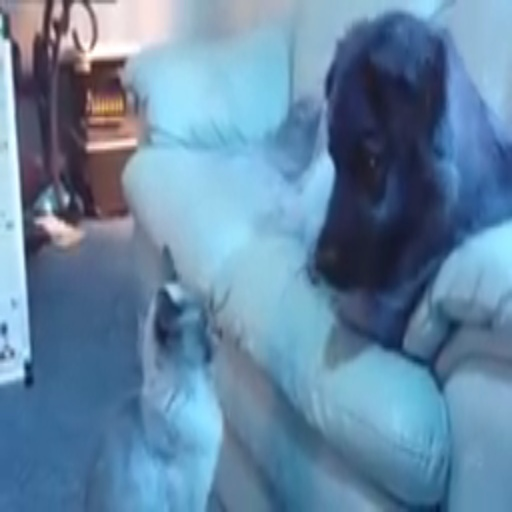

t8tjT9MA7yU_25404.jpg


In [ ]:
#@title Video Render by Frame { display-mode: "form", run: "auto" }

def load_render_image(filename):
  img = cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  cv2_imshow(img)
  return img

frame_num = 25404 #@param {type:"slider", min:1, max:36328, step:1}
filename = vid_id + "_" + str(frame_num) + ".jpg"
load_render_image(filename)
print(filename)


In [ ]:
!pip install "tensorflow>=2.0.0"
!pip install --upgrade tensorflow-hub

# For running inference on the TF-Hub module.
import tensorflow as tf

import tensorflow_hub as hub

Requirement already up-to-date: tensorflow-hub in /usr/local/lib/python3.6/dist-packages (0.7.0)


In [ ]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1" #@param ["https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1", "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"]

detector = hub.load(module_handle).signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
def render_results(results, top_items = 5):
  ents = results["detection_class_entities"][:top_items]
  scores = results["detection_scores"][:top_items]
  for i in range(len(ents)):
    print(ents[i], scores[i]) 

In [ ]:
def run_detector(objects, detector, path):
  img = load_render_image(path)

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()

  result = {key:value.numpy() for key,value in result.items()}

  print("Found %d objects." % len(result["detection_scores"]))
  print("Inference time: ", end_time-start_time)
  render_results(result,top_items=objects)

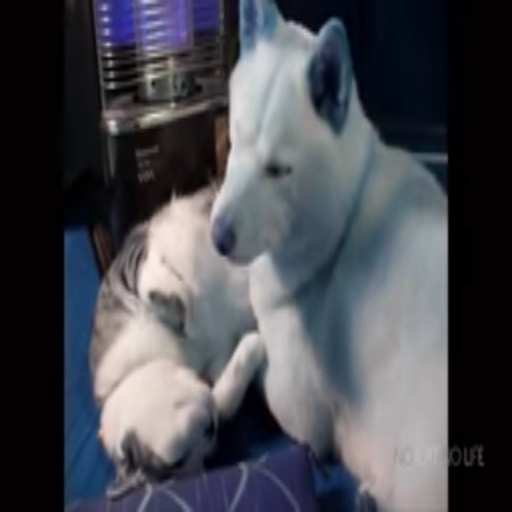

Found 100 objects.
Inference time:  17.837712049484253
b'Dog' 0.986868
b'Dog' 0.9355761
b'Dog' 0.91473585
b'Carnivore' 0.056454983
b'Carnivore' 0.05573021
b'Cat' 0.0514818
b'Book' 0.043478616
b'Carnivore' 0.034580335
b'Animal' 0.022816317
b'Shelf' 0.022710973
b'Animal' 0.013506902
b'Clothing' 0.011511182
b'Mammal' 0.009916209
b'Mammal' 0.008230558
b'Clothing' 0.0073413425
b'Cat' 0.0070425747
b'Clothing' 0.006741127
b'Person' 0.0058057387
b'Shelf' 0.005545199
b'Clothing' 0.005518131
b'Human arm' 0.0050834552


In [ ]:
#@title Count Objects in Frame { display-mode: "form", run: "auto" }

frame_num = 9470 #@param {type:"slider", min:1, max:36328, step:1}
objects = 21 #@param {type:"slider", min:1, max:100, step:1}
filename = vid_id + "_" + str(frame_num) + ".jpg"
run_detector(objects, detector, filename)